# Notebook te execute tests

In [1]:
%load_ext autoreload
%autoreload 2

# The import statements
from test_scripts import *
from experimentRunner import ExperimentRunner
from algorithms import *

def ignore_warnings():
    import warnings
    warnings.simplefilter(action='ignore', category=FutureWarning)
    warnings.simplefilter(action='ignore', category=Warning)

ignore_warnings()

In [2]:
# The setup for the time management
import datetime
currentDate = datetime.date.today()
currentMonthName = currentDate.strftime("%B")
currentDay = currentDate.strftime("%d-%m")

from datetime import datetime

start_year = '2022/09/26'

# convert string to date object
d1 = datetime.strptime(start_year, "%Y/%m/%d")
d2 = datetime.strptime(str(currentDate), "%Y-%m-%d")

# difference between dates in timedelta
delta = d2 - d1
#print(f'Difference is {delta.days} days')

nbWeek = int(delta.days/7) + 1

import os
from pathlib import Path
path = Path('experimenten/' + currentMonthName + '/week' + str(nbWeek)).absolute()
CHECK_FOLDER = os.path.isdir(path)
if not CHECK_FOLDER:
    os.makedirs(path)
    print("created folder : ", path)

else:
    print(path, "folder already exists.")

e:\Projecten\Unif_proj\ThesisCode\Testing\experimenten\October\week4 folder already exists.


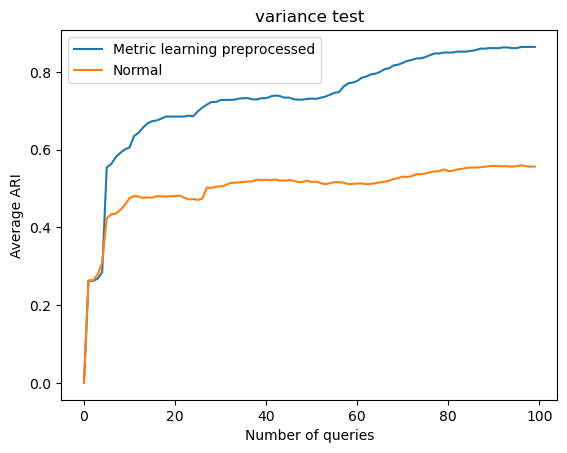

In [26]:
# ff teste
k = ExperimentRunner("variance test", path, currentDay)
k.loadDataSets([])
k.addAlgo([Cobras()])
k.run(runsPQ= 10, metricPreprocessing=True, maxQ=100, crossFold=True)
k.run(runsPQ= 10, maxQ=100, crossFold=True)
k.makePlot(maxQ = 100)
k.SaveBatches()

## Variance test

In [4]:
# variance test
k = ExperimentRunner("variance test", path, currentDay)
k.loadDataSets(["iris", "hepatitis"])
k.addAlgo([Cobras()])
k.run(runsPQ= 10, metricPreprocessing=False, maxQ=150)
k.run(runsPQ= 10, metricPreprocessing=True, maxQ=150)

k.makePlot()


[autoreload of six failed: Traceback (most recent call last):
  File "c:\Users\maart\anaconda3\envs\metric\lib\site-packages\IPython\extensions\autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\maart\anaconda3\envs\metric\lib\site-packages\IPython\extensions\autoreload.py", line 410, in superreload
    update_generic(old_obj, new_obj)
  File "c:\Users\maart\anaconda3\envs\metric\lib\site-packages\IPython\extensions\autoreload.py", line 347, in update_generic
    update(a, b)
  File "c:\Users\maart\anaconda3\envs\metric\lib\site-packages\IPython\extensions\autoreload.py", line 287, in update_class
    old_obj = getattr(old, key)
  File "c:\Users\maart\anaconda3\envs\metric\lib\site-packages\six.py", line 93, in __get__
    setattr(obj, self.name, result)  # Invokes __set__.
AttributeError: 'NoneType' object has no attribute 'cStringIO'
]
[autoreload of pygments.token failed: Traceback (most recent call last):
  File "c:\Users\maart\anaconda

....1 45.0 % dataset: 1/2 algo: 1/1 90.0 %                                              ....  . ......  . ..                                                                ..  . ......  . ......                                                                . ......  . ......                                                                  ......  . ......  .                                                                 ....  . ......  . ..                                                                ..  . ......  . ......                                                                . ......  . ......  .                                                                 ....  . ......  . ....                                                                  

KeyboardInterrupt: 

iris
hepatitis
iris metricPreprocessing
hepatitis metricPreprocessing
hepatitis metricPreprocessing
bestaat al kut
1


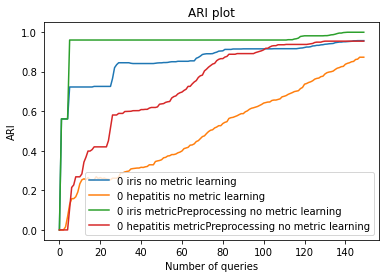

In [23]:
k = ExperimentRunner("variance test", path, currentDay)
k.loadDataSets(["iris", "hepatitis"])
k.load
k.run(runsPQ= 25, maxQ=150)
k.run(runsPQ= 25, maxQ=150, metricPreprocessing=True)
k.clear()

In [5]:
print(k.datasets)

{'breast-cancer-wisconsin.data': {'data': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.22222222,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.11111111, 0.        ,
        0.        ],
       ...,
       [1.        , 1.        , 1.        , ..., 0.66666667, 1.        ,
        0.33333333],
       [1.        , 1.        , 1.        , ..., 0.77777778, 0.77777778,
        0.77777778],
       [1.        , 1.        , 1.        , ..., 0.33333333, 1.        ,
        1.        ]]), 'target': array([2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,